# Set Definition

for Barrier method. (No basic variables, variable inequalities added to constraints)
matrices defined- c, n,b, A, x #(starting x)
t=0.2
tau=0.0001
mu=2

In [93]:
import time
import numpy as np
runtime=[]
def matrixgen(n,tau,mu,t):

    #obj func
    c=(np.array([list(3**(n-j) for j in range(1,n+1))])).T
    #
    b=np.zeros(n+n)
    b[0]=1
    for i in range(2,n+1):
        b[i-1]=9**(i-1)
    b=np.array([b]).T

    N=np.zeros((n,n))
    N[0][0]=1
    for i in range(2,n+1):
        N[i-1,0:i-1]=[2*(3**(i-j)) for j in range(1,i)]
        N[i-1,i-1]=1
    #coefficients
    A=np.concatenate((N,np.eye(n)*-1),axis=0).T    
    #starting x
    x=[0.25]
    for i in range(n-1):
        x.append(9*x[-1])
    while True:

        #if np.max
        #d=1/(b-ax)
        slack=b.T-np.sum((A.T*x),axis=1)
        d=(1/slack).T

        #grad=c-(1/t)*A*d
        grad=c-(1/t)*np.dot(A,d)


        #hessian=-A.T*diag(d^2)*A

        hessian=-(1/t)*np.dot(np.dot(A,np.diag((d**2).T[0])),A.T)
        #print(hessian)

        differential=np.dot(np.linalg.inv(hessian),grad)
        x_new=x-differential.T
        print(x)
        if np.max(np.abs(x-x_new))<tau:
            break


        else:
            x=x_new
            t=t*mu

    print('Final Variables: ',np.round(x))
    return np.round(x)

In [95]:
#Sample: Output for n=6
print('c \n',c,'\n b\n', b, '\n A\n', A,'\n x\n', x)

NameError: name 'c' is not defined

##Barrier method used to solve varying sizes of n

In [94]:

n=2
tic=time.perf_counter()
matrixgen(n=2,tau=0.001,mu=2,t=0.4)
toc=time.perf_counter()
print('runtime:',toc-tic)
runtime.append((n,toc-tic))

[0.25, 2.25]
[[0.36201299 4.94269481]]
[[0.18094413 7.35523077]]
[[0.14081869 7.57824686]]
[[0.05687799 8.60777876]]
[[0.04600445 8.63898309]]
[[7.18172352e-03 8.88020072e+00]]
[[0.01031558 8.93598421]]
[[4.10839149e-03 8.97133613e+00]]
[[3.00337797e-03 8.97560398e+00]]
[[4.49653841e-04 8.99288026e+00]]
[[6.50521175e-04 8.99526411e+00]]
[[2.60335101e-04 8.99734065e+00]]
[[1.87432668e-04 8.99865374e+00]]
Final Variables:  [[0. 9.]]
runtime: 0.02070559999992838


In [96]:
n=4
tic=time.perf_counter()
matrixgen(n=4,tau=0.001,mu=2,t=0.009)
toc=time.perf_counter()
print('runtime:',toc-tic)
runtime.append((n,toc-tic))

[0.25, 2.25, 20.25, 182.25]
[[2.98016332e-01 2.50442224e+00 2.69853880e+01 4.88658031e+02]]
[[2.99378226e-01 2.28100227e+00 2.90951028e+00 6.25603377e+02]]
[[2.70067584e-01 1.40459569e+00 4.69103778e+00 6.34540442e+02]]
[[2.16009172e-01 1.01148409e+00 4.10586133e+00 6.72994984e+02]]
[[1.46055916e-01 4.59761537e-01 5.64938185e-01 7.06776948e+02]]
[[8.09783193e-02 3.24064885e-01 8.47274757e-01 7.10433196e+02]]
[[4.65875153e-02 8.10358537e-02 4.39048109e-01 7.22038000e+02]]
[[2.13170192e-02 9.25826871e-02 2.07895973e-01 7.24372335e+02]]
[[1.34641626e-02 5.61406791e-03 1.16157423e-01 7.27079481e+02]]
[[4.01661203e-03 9.91439745e-03 4.55157762e-02 7.28261478e+02]]
[[3.98698950e-03 1.16551000e-02 3.37108814e-02 7.28277760e+02]]
[[3.18644686e-05 7.47236352e-04 4.55870191e-03 7.28933666e+02]]
[[6.27163433e-05 1.30910433e-03 6.81867940e-03 7.28905417e+02]]
[[1.17595038e-04 1.48068392e-03 3.35258711e-03 7.28946083e+02]]
[[1.80106984e-04 5.13318435e-05 1.73279724e-03 7.28977449e+02]]
[[1.01854504

In [97]:

n=6
tic=time.perf_counter()
matrixgen(n=6,tau=0.001,mu=2,t=0.00001)
toc=time.perf_counter()
print('runtime:',toc-tic)
runtime.append((n,toc-tic))

[0.25, 2.25, 20.25, 182.25, 1640.25, 14762.25]
[[2.94161027e-01 2.35753512e+00 2.05100450e+01 1.85798368e+02
  1.79562516e+03 2.22198377e+04]]
[[3.00513194e-01 2.34739540e+00 2.04445824e+01 1.83827972e+02
  1.69924331e+03 2.66512951e+04]]
[[3.00590348e-01 2.34662574e+00 2.04153013e+01 1.82438626e+02
  1.63266498e+03 3.10649583e+04]]
[[3.00536978e-01 2.34485058e+00 2.03356594e+01 1.78662214e+02
  1.45682060e+03 3.75120467e+04]]
[[3.00365069e-01 2.33914654e+00 2.00828028e+01 1.67413477e+02
  1.08049477e+03 4.35736538e+04]]
[[2.99845981e-01 2.32204753e+00 1.93536625e+01 1.40621084e+02
  6.48142940e+02 4.88180516e+04]]
[[2.98323763e-01 2.27297973e+00 1.74795772e+01 9.66223714e+01
  3.61532100e+02 5.25135036e+04]]
[[2.93958674e-01 2.14067713e+00 1.36494520e+01 5.57663505e+01
  1.83989653e+02 5.51514896e+04]]
[[2.81933768e-01 1.83103460e+00 8.60423234e+00 3.06577919e+01
  9.87741611e+01 5.66973145e+04]]
[[2.51835297e-01 1.29849355e+00 4.86993014e+00 1.53658843e+01
  4.51136457e+01 5.77784339

In [98]:
n=8
tic=time.perf_counter()
matrixgen(n=8,tau=0.001,mu=2,t=0.000001)
toc=time.perf_counter()
print('runtime:',toc-tic)
runtime.append((n,toc-tic))

[0.25, 2.25, 20.25, 182.25, 1640.25, 14762.25, 132860.25, 1195742.25]
[[2.94123518e-01 2.35610602e+00 2.04470450e+01 1.82851783e+02
  1.65481652e+03 1.54409492e+04 1.65580311e+05 2.77617887e+06]]
[[3.00492281e-01 2.34672358e+00 2.04142454e+01 1.82393270e+02
  1.63370716e+03 1.43283949e+04 6.30855693e+04 3.62534746e+06]]
[[3.00566347e-01 2.34582769e+00 2.03795370e+01 1.80752119e+02
  1.55595094e+03 1.09815519e+04 6.14641578e+04 3.95352102e+06]]
[[3.00510793e-01 2.34398177e+00 2.02971495e+01 1.76951897e+02
  1.40214456e+03 7.98793554e+03 1.84129148e+04 4.28975976e+06]]
[[3.00352700e-01 2.33874160e+00 2.00661505e+01 1.66951811e+02
  1.09439046e+03 4.26113480e+03 1.93539780e+04 4.48307541e+06]]
[[2.99893295e-01 2.32361482e+00 1.94223623e+01 1.43380257e+02
  6.87316525e+02 2.62837847e+03 1.50436635e+03 4.64059032e+06]]
[[2.98571936e-01 2.28093180e+00 1.77739611e+01 1.02566935e+02
  3.90569290e+02 1.03813421e+03 2.56684426e+03 4.68336625e+06]]
[[2.94807698e-01 2.16568079e+00 1.42851104e+01 6

In [89]:
n=10
tic=time.perf_counter()
matrixgen(n=10,tau=0.001,mu=2,t=0.000000001)
toc=time.perf_counter()
print('runtime:',toc-tic)
runtime.append((n,toc-tic))

[0.25, 2.25, 20.25, 182.25, 1640.25, 14762.25, 132860.25, 1195742.25, 10761680.25, 96855122.25]
[[2.94119812e-01 2.35596485e+00 2.04408216e+01 1.82560706e+02
  1.64090683e+03 1.47713011e+04 1.33261002e+05 1.21504156e+06
  1.16940701e+07 1.41909492e+08]]
[[3.00494062e-01 2.34679016e+00 2.04171745e+01 1.82533505e+02
  1.64080338e+03 1.47669280e+04 1.33049205e+05 1.20478659e+06
  1.11944977e+07 1.64137630e+08]]
[[3.00591402e-01 2.34666139e+00 2.04169566e+01 1.82532297e+02
  1.64076286e+03 1.47650012e+04 1.32956258e+05 1.20032122e+06
  1.09838808e+07 1.84562219e+08]]
[[3.00591394e-01 2.34666037e+00 2.04169122e+01 1.82530185e+02
  1.64066104e+03 1.47600820e+04 1.32718173e+05 1.18871364e+06
  1.03944514e+07 2.19334933e+08]]
[[3.00591291e-01 2.34665695e+00 2.04167588e+01 1.82522874e+02
  1.64030869e+03 1.47430751e+04 1.31899533e+05 1.14996780e+06
  8.73599071e+06 2.62840759e+08]]
[[3.00590970e-01 2.34664629e+00 2.04162799e+01 1.82500044e+02
  1.63920912e+03 1.46901961e+04 1.29403491e+05 1.043

In [99]:
n=12
tic=time.perf_counter()
matrixgen(n=12,tau=0.001,mu=2,t=0.000000000001)
toc=time.perf_counter()
print('runtime:',toc-tic)
runtime.append((n,toc-tic))


[0.25, 2.25, 20.25, 182.25, 1640.25, 14762.25, 132860.25, 1195742.25, 10761680.25, 96855122.25, 871696100.25, 7845264902.25]
[[2.94119768e-01 2.35596316e+00 2.04407470e+01 1.82557215e+02
  1.64073996e+03 1.47632679e+04 1.32873294e+05 1.19631385e+06
  1.07892022e+07 9.81848697e+07 9.35953298e+08 1.09504008e+10]]
[[3.00494039e-01 2.34678942e+00 2.04171407e+01 1.82531894e+02
  1.64072571e+03 1.47631769e+04 1.32868053e+05 1.19605735e+06
  1.07768133e+07 9.75890367e+07 9.08190230e+08 1.17711287e+10]]
[[3.00591391e-01 2.34666102e+00 2.04169400e+01 1.82531510e+02
  1.64072490e+03 1.47631678e+04 1.32867667e+05 1.19603886e+06
  1.07759365e+07 9.75509265e+07 9.07341410e+08 1.19257973e+10]]
[[3.00591412e-01 2.34666099e+00 2.04169400e+01 1.82531509e+02
  1.64072487e+03 1.47631666e+04 1.32867608e+05 1.19603599e+06
  1.07757976e+07 9.75440957e+07 9.06970516e+08 1.21982225e+10]]
[[3.00591412e-01 2.34666099e+00 2.04169399e+01 1.82531507e+02
  1.64072478e+03 1.47631619e+04 1.32867379e+05 1.19602491e+06

In [104]:

n=14
tic=time.perf_counter()
matrixgen(n=14,tau=0.001,mu=4,t=0.0000000000000005)
toc=time.perf_counter()
print('runtime:',toc-tic)
runtime.append((n,toc-tic))

[0.25, 2.25, 20.25, 182.25, 1640.25, 14762.25, 132860.25, 1195742.25, 10761680.25, 96855122.25, 871696100.25, 7845264902.25, 70607384120.25, 635466457082.25]
[[2.94119767e-01 2.35596311e+00 2.04407448e+01 1.82557112e+02
  1.64073506e+03 1.47630319e+04 1.32861906e+05 1.19576377e+06
  1.07626240e+07 9.69005686e+07 8.73891944e+08 7.95137543e+09
  7.57350393e+10 8.83254133e+11]]
[[3.00494038e-01 2.34678939e+00 2.04171396e+01 1.82531839e+02
  1.64072303e+03 1.47630475e+04 1.32861802e+05 1.19575526e+06
  1.07622051e+07 9.68803130e+07 8.72913985e+08 7.90435759e+09
  7.35495100e+10 9.43528246e+11]]
[[3.00591390e-01 2.34666099e+00 2.04169389e+01 1.82531457e+02
  1.64072238e+03 1.47630462e+04 1.32861789e+05 1.19575471e+06
  1.07621787e+07 9.68790423e+07 8.72853899e+08 7.90178948e+09
  7.35036790e+10 9.47531740e+11]]
[[3.00591412e-01 2.34666096e+00 2.04169389e+01 1.82531457e+02
  1.64072238e+03 1.47630462e+04 1.32861789e+05 1.19575470e+06
  1.07621783e+07 9.68790229e+07 8.72852962e+08 7.90174441e

LinAlgError: Singular matrix

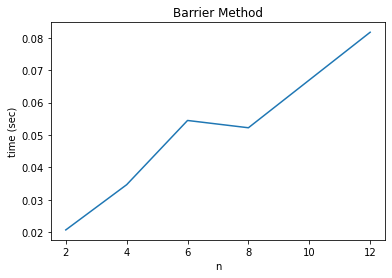

In [133]:
runtime
import matplotlib.pyplot as plt
plt.plot(*zip(*runtime))
plt.xlabel('n')
plt.ylabel('time (sec)')
plt.title('Barrier Method')
plt.show()

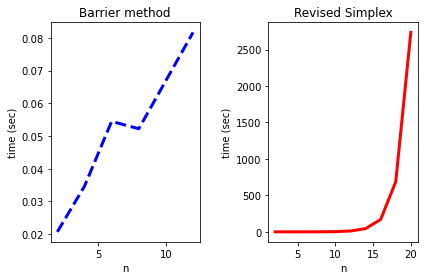

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(*zip(*runtime),color="blue", lw=3, ls='--')
axes[1].plot(*zip(*runtime_simplex),color="red", lw=3, ls='-')

axes[0].set_xlabel('n')
axes[0].set_ylabel('time (sec)')
axes[0].set_title('Barrier method')
axes[1].set_xlabel('n')
axes[1].set_ylabel('time (sec)')
axes[1].set_title('Revised Simplex')

plt.tight_layout()

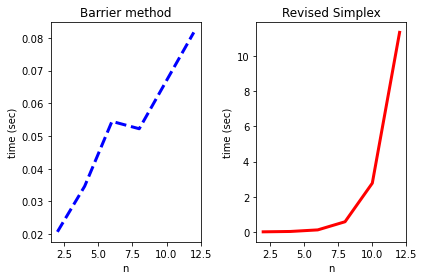

In [131]:
#using the same range for both methods, n=2,12,2

#runtime_simplex imported from the Revised_simplex program
runtime_simplex=[(2, 0.004393400000026304),
 (4, 0.025085700000090583),
 (6, 0.11433179999994536),
 (8, 0.5772845999999845),
 (10, 2.7713138999999956),
 (12, 11.342808300000115)]
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(*zip(*runtime),color="blue", lw=3, ls='--')
axes[1].plot(*zip(*runtime_simplex),color="red", lw=3, ls='-')

axes[0].set_xlabel('n')
axes[0].set_ylabel('time (sec)')
axes[0].set_title('Barrier method')
axes[1].set_xlabel('n')
axes[1].set_ylabel('time (sec)')
axes[1].set_title('Revised Simplex')

plt.tight_layout()